# Project (E) 448
## Kernel Regression


### Daniël S. van der Westhuizen
### 17158680

In [1]:
#imports
import numpy as np
import pylab as pl
from numpy.linalg import inv
from functions import *

In [2]:
#functions

def multivar_gauss(x_vector,mean_vector,var):
    #x_vector and mean_vector must be 1D arrays of the same length
    #var is omega, NOT omega^2
    deviation = np.sqrt(np.sum(  ( (np.atleast_2d(x_vector).ravel() - np.atleast_2d(mean_vector).ravel() )**2).ravel()))
    phi = np.exp(-(deviation**2)/(2*(var**2)))
    return phi

### Kernels



When using kernel regression, usage is made of a function $ k(\textbf{x},\textbf{x'}) $ that relates any 2 points on the input space, rather than defining basis functions, because that demands a lot of processing.

I will attempt to replicate figure 6.3 in Bishop. In this example, the Nadaraya-Watson model is used to evaluate the output of the test input points using the function

$$ p ( t | x) = \frac{ \sum_n f( \textbf{x} - \textbf{x}_n, t - t_n) }{ \sum_m \int f( \textbf{x} - \textbf{x}_m, t - t_m) dt } \qquad (6.48) $$

where f(x,t) is a zero-mean isotropic Gaussian with variance $ \sigma $. m and n are defined over the interval [0,N-1], where N is the number of training points. The training points are evenly spaced points over the input space interval [0,1] and the output has Gaussian noise. It is plotted below

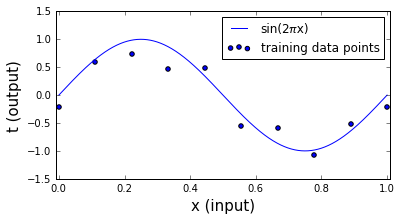

In [3]:
%matplotlib inline
pl.figure(figsize=(6,3))

#mathematics
N = 10
x_train = np.linspace(0,1,N)
#x = [ 0,0.45,0.55,1]
t_train = np.zeros(N)
for a in range(0,N):
    t_train[a] = np.sin(x_train[a]*2*np.pi) + np.random.normal(0,0.2)
    
#figure
x_orig_plot = np.linspace(0,1,10000)
pl.scatter(x_train,t_train,label="training data points")
pl.plot(x_orig_plot,np.sin(x_orig_plot*2*np.pi),label="sin(2πx)")
pl.legend(loc='upper right')
pl.xlim(-0.01,1.01)
pl.ylabel('t (output)', fontsize=15)
pl.xlabel('x (input)', fontsize=15)

The equation for the best prediction is the same as equation 6.48, except that the 't' argument of f(x,t) is always zero and thus can be ignored. The integral becomes obsolete (equal to one) because its argument no longer contains the 't' variable. We are thus left with equation 6.45.

$$ y(\textbf{x}) = \frac{ \sum_n g( \textbf{x} - \textbf{x}_n) t_n }{ \sum_m g( \textbf{x} - \textbf{x}_m) } \qquad (6.45) $$

The g(x) is the same as the f(x) of before except that the multivariate Gaussian with variance  is now only over the input space. Below is the code for evaluating $ y(\textbf{x}) $ for this example.

In [4]:
s = 0.1
x_test = np.linspace(0,2,200)
y_pred = np.zeros(200)
for b in range(0,200):
    y_numerator = 0
    y_denominator = 0
    for a in range (0,N):
        y_numerator += t_train[a]*multivar_gauss(x_test[b],x_train[a],s)
        y_denominator += multivar_gauss(x_test[b],x_train[a],s)
    y_pred[b] = y_numerator / y_denominator

Below is the plot of the prediction after experimenting with different values of $ \sigma $ until one that works well ($ \sigma = 0.1 $) was found.

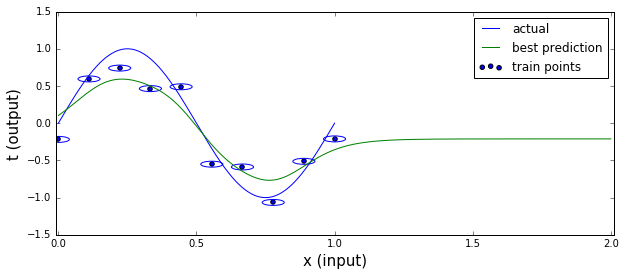

In [5]:
%matplotlib inline
pl.figure(figsize=(10,4))

pl.plot(x_orig_plot,np.sin(x_orig_plot*2*np.pi),label="actual")
pl.plot(x_test,y_pred,label="best prediction")
pl.scatter(x_train,t_train,label="train points")
pl.legend(loc='upper right')
pl.xlim(-0.01,2.01)
pl.ylabel('t (output)', fontsize=15)
pl.xlabel('x (input)', fontsize=15)

ax = pl.gca()
for a in range (0,N):
    plot_circle = pl.Circle((x_train[a], t_train[a]), 0.04, color='b', fill=False)
    ax.add_artist(plot_circle)

How do I determine the variance of the output?

How do I evaluate the t-integral in equation 6.48? Could I do this by evaluating the integrand for t=linspace(-10,10,1000) and then multiply the sum of them with 0.01?

To-Do: determine the average probability of the actual ouput

I will now try this technique on synthetic data with a two-dimensional input. The arbitrary synthetic data is displayed below.

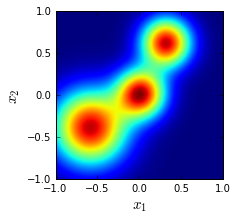

In [6]:
%matplotlib inline
pl.figure(figsize=(3,3))

#mathematics
t_actual_grid = np.zeros((100,100))
for a in range(0,100):
    for b in range(0,100):
        x_loc = -1 + (b*0.02)
        y_loc = -1 + (a*0.02)
        r1 = np.exp( -( (( np.sqrt((x_loc+0.6)**2 + (y_loc+0.4)**2) ))**2) / (2*(0.3**2)) )
        r2 = np.exp( -( (( np.sqrt((x_loc)**2 + (y_loc)**2) ))**2) / (2*(0.2**2)) )
        r3 = np.exp( -( (( np.sqrt((x_loc-0.3)**2 + (y_loc-0.6)**2) ))**2) / (2*(0.2**2)) )
        t_actual_grid[a][b] = r1 + r2 + r3
        
#figure
pl.imshow(t_actual_grid, extent=[-1,1,1,-1])
pl.ylabel(r'$x_2$', fontsize=15)
pl.xlabel(r'$x_1$', fontsize=15)
pl.gca().invert_yaxis()

Sample points:

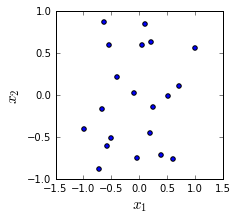

In [7]:
T = 20

x_train = np.random.rand(2,T)*2 - 1
t_train = np.random.rand(T)
for a in range(0,T):
    x_loc = x_train[0,a]
    y_loc = x_train[1,a]
    r1 = np.exp( -( (( np.sqrt((x_loc+0.6)**2 + (y_loc+0.4)**2) ))**2) / (2*(0.3**2)) )
    r2 = np.exp( -( (( np.sqrt((x_loc)**2 + (y_loc)**2) ))**2) / (2*(0.2**2)) )
    r3 = np.exp( -( (( np.sqrt((x_loc-0.3)**2 + (y_loc-0.6)**2) ))**2) / (2*(0.2**2)) )
    t_train[a] = r1 + r2 + r3
    
%matplotlib inline
pl.figure(figsize=(3,3))
pl.scatter(x_train[0,:],x_train[1,:])
pl.ylabel(r'$x_2$', fontsize=15)
pl.xlabel(r'$x_1$', fontsize=15)

In [8]:
#Test point grid
pred_means = np.zeros(2500)
x_test = np.zeros((2500,2))
row_count = 0
column_count = 0
for a in range(0,50):
    for b in range(0,50):
        x_loc = -1 + (b*0.04)
        y_loc = -1 + (a*0.04)
        x_test[a+50*b,0] = x_loc
        x_test[a+50*b,1] = y_loc

In [9]:
#calulate prediction
s = 0.16
y_pred = np.zeros(2500)
for b in range(0,2500):
    y_numerator = 0
    y_denominator = 0
    for a in range (0,T):
        y_numerator += t_train[a]*multivar_gauss(x_test[b,:],np.transpose(x_train)[a,:],s)
        y_denominator += multivar_gauss(x_test[b,:],np.transpose(x_train)[a,:],s)
    y_pred[b] = y_numerator / y_denominator

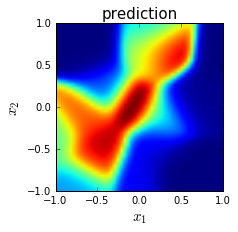

In [10]:
%matplotlib inline
pl.figure(figsize=(3,3))

y_pic = np.transpose(y_pred.reshape(50,50))
pl.imshow(y_pic, extent=[-1,1,1,-1])
pl.gca().invert_yaxis()
pl.title("prediction", fontsize=15)
pl.ylabel(r'$x_2$', fontsize=15)
pl.xlabel(r'$x_1$', fontsize=15)

Not good. It is very dependant on my choise of $ \sigma $

### Gaussian Processes for Regression

Here follows an explanation of Gaussian process regression. All equations are from Bishop (2006).If input values $ \textsf{x}_1 ,..., \textsf{x}_N $ and corresponding target values $ \textbf{t}_N = (t_1 ,..., t_N )^T $ are provided, it can be used to predict the target value $ t_{N+1} $ seperately for each of the given input values. The given input value for which a prediction is currently being made will be denoted $ x_{N+1} $.

One widely used kernel function for Gaussian process regression is given by 

$$ k(\textsf{x}_n , \textsf{x}_m ) = \theta_0 exp \{ - \frac{\theta_1}{2} || \textsf{x}_n - \textsf{x}_m ||^2 \} + \theta_2 + \theta_3 \textsf{x}^T_n \textsf{x}_m  \qquad (6.63)  $$

where $ \theta_0 ,.... \theta_3 $ are parameters.

$ C_{N+1} $ is a (N+1) × (N+1) covariance matrix with elements given by (6.62).

$$ C(\textsf{x}_n , \textsf{x}_m ) = k(\textsf{x}_n , \textsf{x}_m ) + \beta^{-1} \delta_{nm}  \qquad  (6.62) $$

$ \delta_{nm} $ is the dirac delta function.

$ C_{N+1} $ gets partitioned into equation (6.65). Equations (2.81) and (2.82) can then be used to derive equations (6.66) and (6.67). These last two equations is the mean and variance of the prediction made by the Gaussian process regression.

$$    C_{N+1} = \left( \begin{array}{ccc}
C_{N} & \textbf{k} \\
\textbf{k}^{T} & c \end{array} \right) \qquad (6.65) $$

$$ m(\textbf{x}_{N+1}) = \textbf{k}^T C^{-1}_N \textbf{t} \qquad (6.66) $$

$$ \sigma^2 (\textbf{x}_{N+1}) = c - \textbf{k}^T \textbf{C}^{-1}_N \textbf{k} \qquad (6.67) $$

Here follows a demonstration of Gaussian process regression for a simple example. As usual, samples of sinusoid with Gaussian noise will be used as training points.

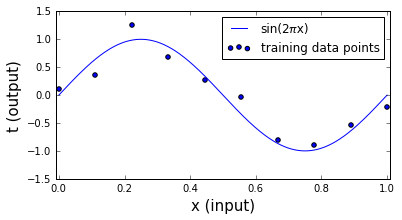

In [11]:
%matplotlib inline
pl.figure(figsize=(6,3))

#mathematics
N = 10
x_train = np.atleast_2d(np.linspace(0,1,N)).transpose()
#x = [ 0,0.45,0.55,1]
t_train = np.zeros(N)
for a in range(0,N):
    t_train[a] = np.sin(x_train[a]*2*np.pi) + np.random.normal(0,0.2)
    
#figure
x_orig_plot = np.linspace(0,1,10000)
pl.scatter(x_train,t_train,label="training data points")
pl.plot(x_orig_plot,np.sin(x_orig_plot*2*np.pi),label="sin(2πx)")
pl.legend(loc='upper right')
pl.xlim(-0.01,1.01)
pl.ylabel('t (output)', fontsize=15)
pl.xlabel('x (input)', fontsize=15)

Python functions for evaluating equations (6.62), (6.65), (6.66), (6.67) has been written in 'functions.py', with the names com_gauss_proc_kern, gauss_proc_kern_reg_cov respectively, gauss_proc_kern_reg_pred_mean, gauss_proc_kern_reg_pred_var respectively.

In [12]:
theta0 = 1
theta1 = 5
theta2 = 1
theta3 = 1
beta = 4

x_test = np.atleast_2d(np.linspace(0,2,100)).transpose()
means = np.zeros(100)
var = np.zeros(100)
for a in range(0,100):
    C_N, k, k_T, c, C_N_full, inv_cov_N = gauss_proc_kern_reg_cov(x_train,x_test[a,:],theta0,theta1,theta2,theta3,beta)
    means[a] = gauss_proc_kern_reg_pred_mean(k_T,C_N,t_train, inv_cov_N)
    var[a] = gauss_proc_kern_reg_pred_var(c,k_T,C_N,k, inv_cov_N)

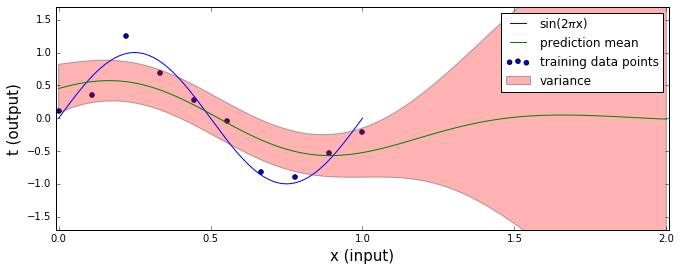

In [13]:
%matplotlib inline
pl.figure(figsize=(11,4))

x_orig_plot = np.linspace(0,1,10000)
pl.scatter(x_train,t_train,label="training data points")
pl.plot(x_orig_plot,np.sin(x_orig_plot*2*np.pi),label="sin(2πx)")
pl.xlim(-0.01,2.01)
pl.ylim(-1.7,1.7)
pl.ylabel('t (output)', fontsize=15)
pl.xlabel('x (input)', fontsize=15)

pl.plot(x_test,means,label="prediction mean")
pl.fill_between(x_test.ravel(),means-var,means+var,facecolor='red',alpha=0.3,label="variance")
pl.legend(loc='upper right')

The result is very dependent on my choice of parameters.

The following equation can be used to determine the parameter gradient of the the probability of the training points, which can then be used to find better values for the parameters. Below I define functions to caculate it.

$$ \frac{d}{d \theta_i} \textsf{ln} \textit{p} (\textbf{t}| \theta{} ) = - \frac{1}{2} Tr( C^{-1}_N  \frac{d C_N}{d \theta_i} ) + \frac{1}{2} \textbf{t}^T C^{-1}_N \frac{d C_N}{d \theta_i} C^{-1}_N \textbf{t}  \qquad (6.70)  $$

The derivatives I determined for the above equation

$$ \frac{d C_N}{d \theta_0} = exp \{ - \frac{\theta_1}{2} || \textsf{x}_n - \textsf{x}_m ||^2 \}  $$

$$ \frac{d C_N}{d \theta_1} = \theta_0 ( exp \{ - \frac{\theta_1}{2} || \textsf{x}_n - \textsf{x}_m ||^2 \} )  \{ - \frac{1}{2} || \textsf{x}_n - \textsf{x}_m ||^2 \} $$

$$ \frac{d C_N}{d \theta_2} = 1  $$

$$ \frac{d C_N}{d \theta_3} = \textsf{x}^T_n \textsf{x}_m  $$

I found that the if LH side of equation 6.70 is subtracted from the parameters, a better prediction can be obtained.

In [14]:
N = 20
e1,e2,e3,e4,e5,e6,e7,e8 = optim_kern_param(theta0,theta1,theta2,theta3,beta,N,x_train,t_train)
theta0_new = e1; theta1_new = e2; theta2_new = e3; theta3_new = e4
theta0_array = e5; theta1_array = e6; theta2_array = e7; theta3_array = e8

Below are the values of the parameters during throughout 20 iterations.

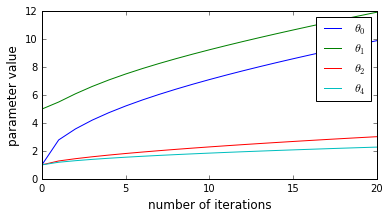

In [15]:
%matplotlib inline
pl.figure(figsize=(6,3))

plot_x = np.arange(0,N+1,1)

pl.plot(plot_x,theta0_array,label=r"$\theta_{0}$")
pl.plot(plot_x,theta1_array,label=r"$\theta_{1}$")
pl.plot(plot_x,theta2_array,label=r"$\theta_{2}$")
pl.plot(plot_x,theta3_array,label=r"$\theta_{4}$")
pl.ylabel('parameter value', fontsize=12)
pl.xlabel('number of iterations', fontsize=12)
pl.legend(loc='upper right')

In [16]:
x_test = np.atleast_2d(np.linspace(0,2,100)).transpose()
means = np.zeros(100)
var = np.zeros(100)
for a in range(0,100):
    C_N, k, k_T, c, C_N_full, inv_cov_N = gauss_proc_kern_reg_cov(x_train,x_test[a,:],theta0_new,theta1_new,theta2_new,theta3_new,beta)
    means[a] = gauss_proc_kern_reg_pred_mean(k_T,C_N,t_train, inv_cov_N)
    var[a] = gauss_proc_kern_reg_pred_var(c,k_T,C_N,k, inv_cov_N)

Below are the prediction using the parameters obtained after 20 iterations. This is very good prediction.

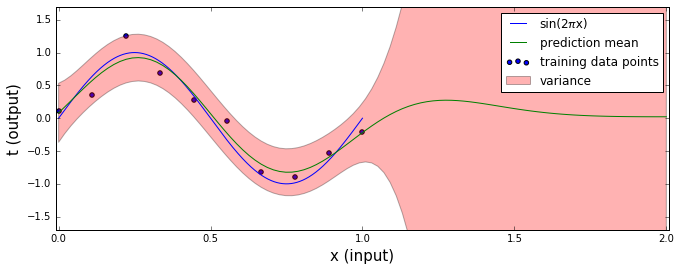

In [17]:
%matplotlib inline
pl.figure(figsize=(11,4))

x_orig_plot = np.linspace(0,1,10000)
pl.scatter(x_train,t_train,label="training data points")
pl.plot(x_orig_plot,np.sin(x_orig_plot*2*np.pi),label="sin(2πx)")
pl.xlim(-0.01,2.01)
pl.ylim(-1.7,1.7)
pl.ylabel('t (output)', fontsize=15)
pl.xlabel('x (input)', fontsize=15)

pl.plot(x_test,means,label="prediction mean")
pl.fill_between(x_test.ravel(),means-var,means+var,facecolor='red',alpha=0.3,label="variance")
pl.legend(loc='upper right')

Using very many iterations or choosing very high prior parameters yields the problematic result in the figure below.

In [18]:
N = 500
e1,e2,e3,e4,e5,e6,e7,e8 = optim_kern_param(theta0,theta1,theta2,theta3,beta,N,x_train,t_train)
theta0_new = e1; theta1_new = e2; theta2_new = e3; theta3_new = e4
theta0_array = e5; theta1_array = e6; theta2_array = e7; theta3_array = e8

In [19]:
x_test = np.atleast_2d(np.linspace(0,2,100)).transpose()
means = np.zeros(100)
var = np.zeros(100)
for a in range(0,100):
    C_N, k, k_T, c, C_N_full, inv_cov_N = gauss_proc_kern_reg_cov(x_train,x_test[a,:],theta0_new,theta1_new,theta2_new,theta3_new,beta)
    means[a] = gauss_proc_kern_reg_pred_mean(k_T,C_N,t_train, inv_cov_N)
    var[a] = gauss_proc_kern_reg_pred_var(c,k_T,C_N,k, inv_cov_N)

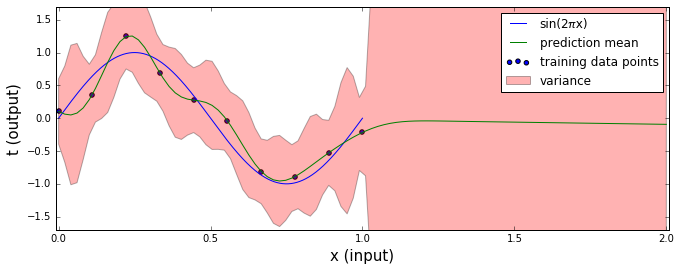

In [20]:
%matplotlib inline
pl.figure(figsize=(11,4))

x_orig_plot = np.linspace(0,1,10000)
pl.scatter(x_train,t_train,label="training data points")
pl.plot(x_orig_plot,np.sin(x_orig_plot*2*np.pi),label="sin(2πx)")
pl.xlim(-0.01,2.01)
pl.ylim(-1.7,1.7)
pl.ylabel('t (output)', fontsize=15)
pl.xlabel('x (input)', fontsize=15)

pl.plot(x_test,means,label="prediction mean")
pl.fill_between(x_test.ravel(),means-var,means+var,facecolor='red',alpha=0.3,label="variance")
pl.legend(loc='upper right')

Although the the training points get predicted perfectly, the prediction no longer represents the sinusoidal wave that the training points was derived from. This technique would thus work very well if the training points are noiseless (unlike this example). Care needs to be taken when applying this parameter estimator.

I have added all the definitions in this file to the file functions.py for use in other notebook files. I will continue with 2D synthetic data in 17158680_skripsie_kernel_gauss_2d.ipynb (which will be exported to 17158680_skripsie_kernel_gauss_2d.html).